# ¿Qué son las columnas?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

In [2]:
#Se lee el excel con los datos del diccionario
info_df = pd.read_excel(r'data/Data Dictionary.xls')

info_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


In [3]:
info_df.columns = ['Variable Name', 'Description', 'Type']

info_df = info_df.drop([0])

info_df

,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
10,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


In [4]:
#Se renombra columnas
info_df['Description'] = info_df['Description'].replace({'Person experienced 90 days past due delinquency or worse ': 'Target', 
                         'Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits': 'Balance créditos personales', 
                         'Age of borrower in years': 'Edad',
                         'Number of times borrower has been 30-59 days past due but no worse in the last 2 years.': 'Morosidad entre 30 y 59 días (no empeorada en 2 años)',
                         'Monthly debt payments, alimony,living costs divided by monthy gross income': 'Ratio de deuda',
                         'Monthly income': 'Ingresos mensuales',
                       'Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)': 'Nº de prestamos abiertos',
                       'Number of times borrower has been 90 days or more past due.': 'Nº de veces pago atrasado más de 90 días',
                       'Number of mortgage and real estate loans including home equity lines of credit': 'Nº de hipotecas',
                       'Number of times borrower has been 60-89 days past due but no worse in the last 2 years.': 'Morosidad entre 60 y 89 días (no empeorada en 2 años)',
                       'Number of dependents in family excluding themselves (spouse, children etc.)': 'Nº dependientes (excluyendose a si mismos)'})
info_df

,Variable Name,Description,Type
1,SeriousDlqin2yrs,Target,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Balance créditos personales,percentage
3,age,Edad,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Morosidad entre 30 y 59 días (no empeorada en ...,integer
5,DebtRatio,Ratio de deuda,percentage
6,MonthlyIncome,Ingresos mensuales,real
7,NumberOfOpenCreditLinesAndLoans,Nº de prestamos abiertos,integer
8,NumberOfTimes90DaysLate,Nº de veces pago atrasado más de 90 días,integer
9,NumberRealEstateLoansOrLines,Nº de hipotecas,integer
10,NumberOfTime60-89DaysPastDueNotWorse,Morosidad entre 60 y 89 días (no empeorada en ...,integer


## Importamos y exploramos los datos de entrenamiento

In [5]:
#Se lee el excel con datos de train
train_df = pd.read_csv(r'data/train.csv')

train_df

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
1,2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
2,3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
3,4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
4,5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
104800,149990,0,0.055518,46,0,0.609779,4335.0,7,0,1,0,2.0
104801,149991,0,0.104112,59,0,0.477658,10316.0,10,0,2,0,0.0
104802,149993,0,1.000000,22,0,0.000000,820.0,1,0,0,0,0.0
104803,149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [6]:
#Se muestra la información del DataFrame train
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104805 entries, 0 to 104804
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Id                                    104805 non-null  int64  
 1   SeriousDlqin2yrs                      104805 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  104805 non-null  float64
 3   age                                   104805 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  104805 non-null  int64  
 5   DebtRatio                             104805 non-null  float64
 6   MonthlyIncome                         84024 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       104805 non-null  int64  
 8   NumberOfTimes90DaysLate               104805 non-null  int64  
 9   NumberRealEstateLoansOrLines          104805 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  104805 non-null  int64  
 11  

Sustituimos los missings de Monthly income por la media del mothly income

In [7]:
train_df['MonthlyIncome'].mean()

train_df['NumberOfDependents'] = train_df['NumberOfDependents'].fillna(train_df['NumberOfDependents'].mean())

train_df['MonthlyIncome'] = train_df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].mean())

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104805 entries, 0 to 104804
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Id                                    104805 non-null  int64  
 1   SeriousDlqin2yrs                      104805 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  104805 non-null  float64
 3   age                                   104805 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  104805 non-null  int64  
 5   DebtRatio                             104805 non-null  float64
 6   MonthlyIncome                         104805 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       104805 non-null  int64  
 8   NumberOfTimes90DaysLate               104805 non-null  int64  
 9   NumberRealEstateLoansOrLines          104805 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  104805 non-null  int64  
 11  

In [8]:
#Se lee el excel con los datos de test
test_df = pd.read_csv("data/test.csv")
test_df

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,9,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,17,0.166284,53,0,0.188274,8800.0,7,0,0,0,0.0
3,18,0.221813,43,0,0.527888,3280.0,7,0,1,0,2.0
4,24,0.046560,58,0,0.241622,2416.0,9,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
45190,149992,0.871976,50,0,4132.000000,NaN,11,0,1,0,3.0
45191,149994,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
45192,149995,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
45193,149996,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0


In [9]:
test_df['MonthlyIncome'].mean()

test_df.drop(test_df.columns[0], axis=1)

test_df['NumberOfDependents'] = test_df['NumberOfDependents'].fillna(test_df['NumberOfDependents'].mean())

test_df['MonthlyIncome'] = test_df['MonthlyIncome'].fillna(test_df['MonthlyIncome'].mean())

test_df.info()

test_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45195 entries, 0 to 45194
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    45195 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  45195 non-null  float64
 2   age                                   45195 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  45195 non-null  int64  
 4   DebtRatio                             45195 non-null  float64
 5   MonthlyIncome                         45195 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       45195 non-null  int64  
 7   NumberOfTimes90DaysLate               45195 non-null  int64  
 8   NumberRealEstateLoansOrLines          45195 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  45195 non-null  int64  
 10  NumberOfDependents                    45195 non-null  float64
dtypes: float64(4), 

Index(['Id', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [10]:
X_test = test_df[['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']]

In [11]:
X_test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.0
2,0.166284,53,0,0.188274,8800.000000,7,0,0,0,0.0
3,0.221813,43,0,0.527888,3280.000000,7,0,1,0,2.0
4,0.046560,58,0,0.241622,2416.000000,9,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
45190,0.871976,50,0,4132.000000,6637.229163,11,0,1,0,3.0
45191,0.385742,50,0,0.404293,3400.000000,7,0,0,0,0.0
45192,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
45193,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0


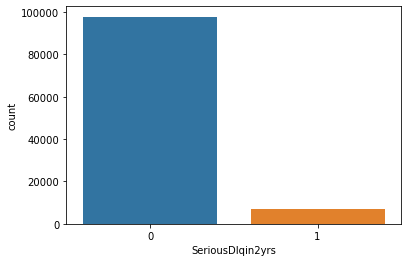

In [12]:
# Se grafica para ver el número de muestras que tiene el 'target'

sns.countplot(data=train_df, x='SeriousDlqin2yrs');

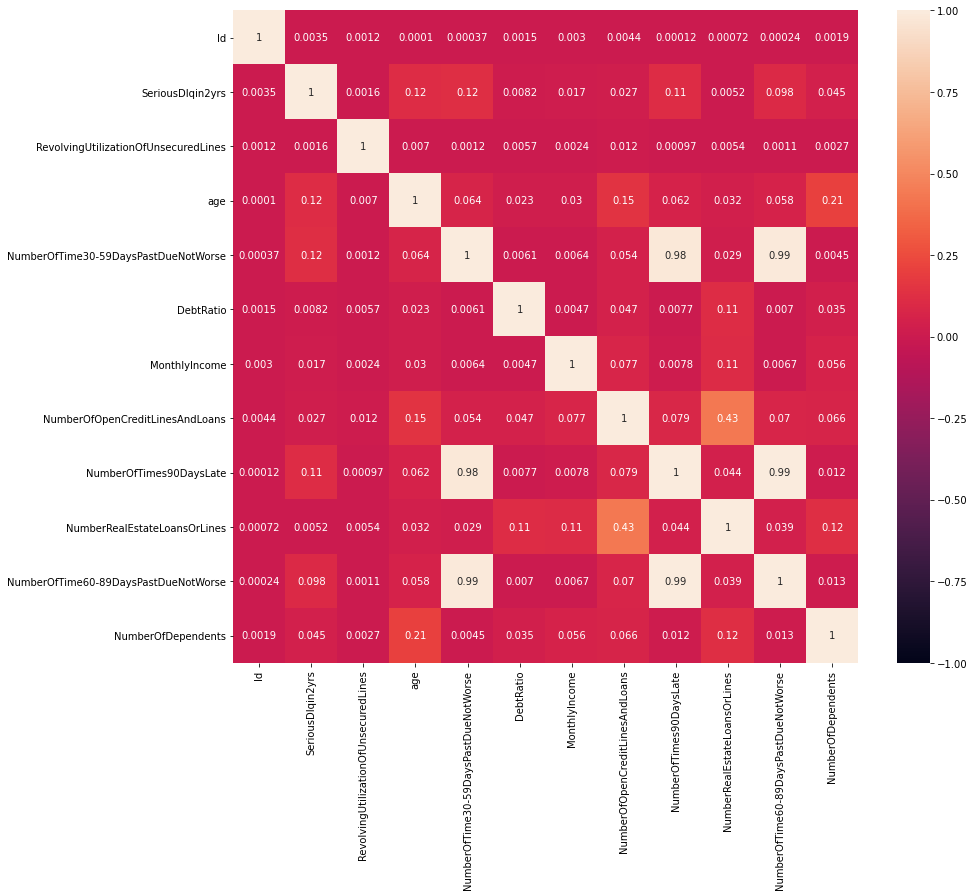

In [13]:
#Se grafica la matriz de correlación

corr = np.abs(train_df.corr())
plt.figure(figsize=(14,12)) #para que el tamaño de los cuadrados de la matriz de correlación sean más grandes
sns.heatmap(data=corr, annot=True, vmax=1, vmin=-1);

In [14]:
#Se divide en X_train (features) e y_train(target)

X_train = train_df[['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
                  'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
                   'NumberOfDependents']]

y_train = train_df[['SeriousDlqin2yrs']]

In [15]:
#Se usa el modelo de Regresión logística

log_reg = LogisticRegression(max_iter = 9e12)

log_reg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=9000000000000.0)

In [16]:
# Se muestran los atributos del modelo de regresión logística coef_, intercept_ y classes_

print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)

[[-5.40397444e-05 -4.15830115e-02  5.20820371e-01 -2.08317522e-05
  -4.59572073e-05 -8.32684238e-03  4.61344379e-01  2.90691535e-02
  -9.53849829e-01  7.06814442e-02]]
[-0.54627166]
[0 1]


In [17]:
#Se crea un DataFrame con los coeficientes 

intercept = log_reg.intercept_
coefs = log_reg.coef_.ravel()

features = pd.DataFrame(coefs, X_train.columns, columns=['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])

features.sort_values('coefficient', ascending=False).head()

,coefficient
NumberOfTime60-89DaysPastDueNotWorse,0.953850
NumberOfTime30-59DaysPastDueNotWorse,0.520820
NumberOfTimes90DaysLate,0.461344
NumberOfDependents,0.070681
age,0.041583


In [18]:
#Se hace la predicción

ypred = log_reg.predict_proba(X_test)

In [19]:
ypred[:,1]

array([0.16973234, 0.0214095 , 0.03868332, ..., 0.02356444, 0.07617737,
       0.03033757])

In [20]:
# Se calcula el área bajao la curva

roc_auc_score(log_reg.predict(X_train), y_train)

0.7397215490359882

In [21]:
# Se genera el Dataframe con la columna Id y la columan de predicciones

result_df = pd.DataFrame({'ID': test_df['Id'], 'SeriousDlqin2yrs': ypred[:,1]})

In [22]:
# Se genera el fichero .zip

compression_opts = dict(method='zip',

                        archive_name='out.csv')  

result_df.to_csv('el_bueno.zip', index=False,

          compression=compression_opts)  